In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm

In [2]:
combined_data = pd.read_csv('../data/intermediates/pre_acpca1.csv')
combined_data.set_index('FIPS', inplace=True)
combined_data.head()

,baseline,Rural-urban_Continuum Code_2013,Density per square mile of land area - Population,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,Unemployment_rate_2018,Med_HH_Income_Percent_of_State_Total_2018,Mar Temp AVG / F,Apr Temp AVG / F,May Temp AVG / F,Jun Temp AVG / F,Total_age65plus,Total households!!Average household size,SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!Nursery school preschool,SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!Kindergarten,SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!Elementary school (grades 1-8),SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!High school (grades 9-12),SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!College or graduate school,HospCt,Deaths
FIPS,,,,,,,,,,,,,,,,,,,,
1003.0,12.067112,3.0,114.6,9.7,31.3,3.6,115.5,59.3,65.8,76.1,80.8,44571.0,2.57,3065.0,1449.0,23254.0,11209.0,6503.0,3,7.0
1051.0,15.867430,2.0,128.2,13.6,24.5,3.4,121.0,55.8,64.4,75.0,78.9,12400.0,2.57,1057.0,546.0,7403.0,5128.0,4022.0,2,7.0
1055.0,9.411457,3.0,195.2,15.5,17.7,4.1,90.0,52.3,62.8,72.8,76.0,19487.0,2.62,1066.0,1299.0,10215.0,4628.0,4019.0,2,8.0
1073.0,9.981023,1.0,592.5,10.3,32.4,3.7,110.3,53.3,63.4,73.7,77.4,104547.0,2.51,11287.0,8847.0,66358.0,32041.0,42212.0,9,14.0
1081.0,7.074980,3.0,230.8,9.5,34.1,3.6,98.1,55.2,63.6,73.8,77.6,19481.0,2.66,3126.0,1152.0,16416.0,8227.0,28826.0,1,11.0


### Lambda=20

In [3]:
acpca_data2 = pd.read_csv('../data/intermediates/post_acpca_all.csv')
acpca_data2.head()
acpca_arr2 = acpca_data2.to_numpy()
acpca_arr2

array([[-3.87677158,  0.56770575, -0.33421511, ...,  1.15266678,
         0.70397573, -0.81565573],
       [-3.08859136,  0.89656038, -0.55599242, ...,  1.67606458,
         0.95029203, -1.52275355],
       [-2.33432031,  1.42210125, -0.44859445, ...,  1.25984598,
        -0.2189054 , -2.09295281],
       ...,
       [ 2.73685899, -1.27069474,  0.09827081, ...,  0.72735896,
        -1.30971676, -1.91132337],
       [ 4.12679592,  3.90238788,  1.11453451, ..., -0.06565853,
         0.03847192, -1.55888985],
       [ 2.14670048, -0.47176643,  0.60443166, ..., -1.522177  ,
         2.33589158,  1.59494843]])

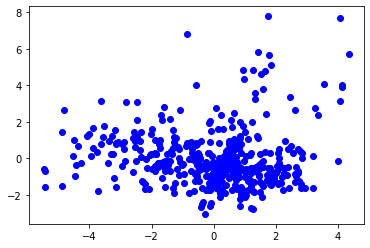

In [4]:
plt.plot(list(acpca_data2['PC1'].values), list(acpca_data2['PC2'].values), 'bo')

In [5]:
X = acpca_arr2[:,:4].reshape(4, -1).T
Y = acpca_arr2[:,4].reshape(1, -1).T
reg = lm.LinearRegression().fit(X,Y)
reg.score(X,Y)

0.01973774670877182

          PC1          PC2       PC3         PC4         PC5        PC6  \
0  1466.14914  1087.903654  383.9124  194.829839  138.048738  90.281432   

         PC7        PC8        PC9       PC10       PC11      PC12      PC13  \
0  45.415104  39.244615  28.822092  21.659057  13.229005  5.863805  5.012908   

       PC14           PC15          PC16          PC17  
0  1.209597 -108684.007194 -1.782933e+06 -9.078022e+06  
PC1     1.466149e+03
PC2     1.087904e+03
PC3     3.839124e+02
PC4     1.948298e+02
PC5     1.380487e+02
PC6     9.028143e+01
PC7     4.541510e+01
PC8     3.924462e+01
PC9     2.882209e+01
PC10    2.165906e+01
PC11    1.322901e+01
PC12    5.863805e+00
PC13    5.012908e+00
PC14    1.209597e+00
PC15   -1.086840e+05
PC16   -1.782933e+06
PC17   -9.078022e+06
Name: 0, dtype: float64


<BarContainer object of 17 artists>

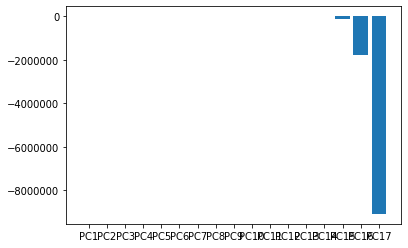

In [6]:
eigens = pd.read_csv('../data/intermediates/eigenvalues_all.csv')
print(eigens.head())
print(eigens.loc[0,eigens.columns.values[0:]])
# labels = ['PC1', 'PC2', 'PC3', 'PC4']
plt.bar(eigens.columns.values[0:], eigens.loc[0,eigens.columns.values[0:]]) 

          PC1          PC2       PC3         PC4         PC5        PC6  \
0  1466.14914  1087.903654  383.9124  194.829839  138.048738  90.281432   

         PC7        PC8        PC9       PC10       PC11      PC12      PC13  \
0  45.415104  39.244615  28.822092  21.659057  13.229005  5.863805  5.012908   

       PC14           PC15          PC16          PC17  
0  1.209597 -108684.007194 -1.782933e+06 -9.078022e+06  


<BarContainer object of 17 artists>

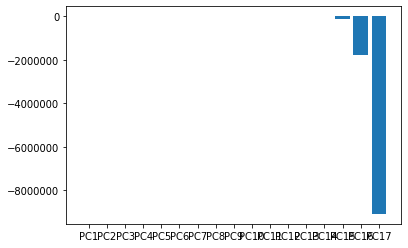

In [7]:
eigens = pd.read_csv('../data/intermediates/eigenvalues_all.csv')
print(eigens.head())
plt.bar(eigens.columns.values, eigens.loc[0,]) 

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.201362  0.149199  0.052662  0.026719  0.018938  0.012379  0.006228   

        PC8       PC9     PC10      PC11      PC12      PC13      PC14  \
0  0.005381  0.003953  0.00297  0.001814  0.000804  0.000687  0.000166   

       PC15     PC16      PC17  
0  0.064138  0.09203  0.360569  


<BarContainer object of 17 artists>

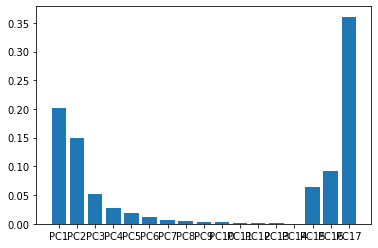

In [8]:
sigs = pd.read_csv('../data/intermediates/sigs_all.csv')
print(sigs.head())
plt.bar(sigs.columns.values, sigs.loc[0,])

In [9]:
eigens['PC1']

0    1466.14914
Name: PC1, dtype: float64

In [10]:
PCs = pd.read_csv('../data/intermediates/PCs_all.csv')
r,c = PCs.shape
PCs.head(20)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,0.307030,0.473967,-0.057728,-0.499975,-0.142507,0.052192,-0.348197,-0.068950,-0.098668,0.056294,0.061457,-0.010373,0.024993,-0.013489,0.439242,-0.233032,-0.117982
1,-0.180881,-0.476074,0.411125,-0.613717,-0.081213,-0.043844,-0.087180,-0.009500,-0.166981,0.131618,0.011938,0.002471,-0.017286,-0.011097,-0.090878,-0.061809,0.347706
2,-0.038644,0.215157,0.562379,0.252724,-0.572051,-0.026819,-0.019431,0.020726,0.023963,-0.071230,0.012331,0.016385,-0.024137,0.006761,-0.265677,-0.364100,-0.182910
3,0.036775,0.025993,0.044699,0.087480,-0.541628,-0.030265,-0.147802,-0.041577,0.070768,-0.064290,0.093438,-0.003476,0.003131,0.012078,0.222608,0.740583,0.233267
4,-0.439885,0.173727,-0.056424,-0.037388,0.004178,-0.713941,-0.020998,-0.045576,0.143433,0.140915,-0.101724,-0.407711,-0.148197,0.005625,0.134574,-0.026957,-0.040681
5,-0.462270,0.150635,-0.015343,-0.010482,0.014746,-0.119624,0.017074,0.073365,0.093752,0.135366,0.116550,0.767573,0.290652,-0.030238,0.164948,-0.024318,-0.003347
6,-0.481138,0.140075,-0.022130,-0.023094,0.050264,0.207123,-0.007779,-0.230065,-0.454459,-0.648812,0.037636,-0.098754,-0.051317,0.018877,0.087806,0.007438,0.005603
7,-0.439009,0.112156,0.015361,0.021727,-0.051200,0.632893,0.032670,0.235114,0.220643,0.383188,-0.062335,-0.297381,-0.099699,0.003849,0.187039,-0.024975,0.032608
8,-0.043350,0.076457,-0.079992,0.185678,0.040949,0.109473,-0.281338,-0.781467,0.103905,0.265883,-0.025944,0.081570,-0.115331,0.057468,-0.169879,-0.115549,0.316648
9,0.083457,0.524499,0.495744,-0.176193,0.418708,0.022413,0.279006,-0.078943,0.068315,0.034794,-0.054470,0.005693,-0.021094,0.014134,-0.185698,0.363803,0.069825


In [11]:
# signifs = {}
# for j in range(c):
#     signifs[j] = sigs.loc[0,'PC' + str(j+1)]
# signifs = {k: v for k, v in sorted(signifs.items(), key=lambda item: -item[1])}

In [12]:
# for j in signifs.keys():
num_pc = 17
num_confound = 3
for j in range(num_pc):
    eig = eigens.loc[0, 'PC' + str(j+1)]
    if eig < 0: 
        continue
    print('Principal Component', str(j+1))
    print('eigenvalue: ', eig)
    PC_dict = {}
    # PC9 = [-0.190896056547888, 0.468236937317933,-0.228567222005448,0.408002822993487,0.0535105125245226,0.407238079363182,0.181820228133276,0.366604933989350,0.435246581102968]
    for i in range(r): 
    #     print('{0:<80} \t {1:>0.3f}'.format(combined_data.columns.values[i+2], PC9[i]))
        PC_dict[combined_data.columns.values[i+num_confound]] = PCs.loc[i,'PC' + str(j+1)]
    PC_dict = {k: v for k, v in sorted(PC_dict.items(), key=lambda item: -abs(item[1]))}
    for k, v in PC_dict.items():
        print('{0:<100} \t {1:>0.3f}'.format(k, v))
    print('\n\n\n')

Principal Component 1
eigenvalue:  1466.14913964758
May Temp AVG / F                                                                                     	 -0.481
Apr Temp AVG / F                                                                                     	 -0.462
Mar Temp AVG / F                                                                                     	 -0.440
Jun Temp AVG / F                                                                                     	 -0.439
Percent of adults with less than a high school diploma 2014-18                                       	 0.307
Percent of adults with a bachelor's degree or higher 2014-18                                         	 -0.181
Deaths                                                                                               	 0.136
HospCt                                                                                               	 0.096
Total households!!Average household size                               